# Acquire data from Google Sheets

In [142]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [143]:
import pandas as pd
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1t8YQOowjGDmUWrSXIpCA0-O09NT5a3RHCyzSzWJQDEo/edit?usp=sharing') # 'https://docs.google.com/spreadsheets/d/1YgjesgjYJh315Kj823ddOlSBEr1bf3AMfDaN3c34_PU/edit?usp=sharing')
sheet = wb.worksheet('Sheet1')
# Now that we have the tab specified it’s time to get the data. To do this we will just call the get_all_values() function off of the sheet object we created above:
data = sheet.get_all_values()

df = pd.DataFrame(data[1:])
df.columns = data[0]

In [144]:
import numpy as np
df[df==''] = np.nan
df = df.drop('Red', axis=1)
df = df.dropna(axis=0)
df.to_csv('PurpleColorConstituentsSurveyData.csv', index=None)

# Read the cleaned data back into a pandas data frame

In [145]:
myData = pd.read_csv('PurpleColorConstituentsSurveyData.csv')
myData

,Blue,Green,Purple,Date
0,17,85,0,7/14/2020 16:55:09
1,95,33,0,7/14/2020 16:55:28
2,98,34,0,7/14/2020 16:56:16
3,168,78,1,7/14/2020 16:56:46
4,28,72,0,7/14/2020 15:36:14
...,...,...,...,...
231,154,70,0,7/14/2020 16:58:34
232,159,20,1,7/14/2020 16:58:55
233,20,159,1,7/14/2020 16:58:55
234,232,148,0,7/14/2020 16:59:13


# Sklearn Logistic Regression model

In [146]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics


X=myData[['Green', 'Blue']]  # Features
y=myData['Purple']  # Labels

myModel = LogisticRegression()
myModel.fit(X,y)

y_pred = myModel.predict([[200, 100]])[0]
y_pred

0

In [147]:
y_pred = myModel.predict(X)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix_0 = confusion_matrix (y, y_pred)
confusion_matrix_0

array([[152,  15],
       [ 31,  38]])

# Lets try non-linear classification (kNN algorithm)

In [149]:
import csv
import numpy as np
colorScores = []
with open('PurpleColorConstituentsSurveyData.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        colorScores.append(row)
f.close()

colorScores = colorScores[1:]
colorScores

[['17', '85', '0', '7/14/2020 16:55:09'],
 ['95', '33', '0', '7/14/2020 16:55:28'],
 ['98', '34', '0', '7/14/2020 16:56:16'],
 ['168', '78', '1', '7/14/2020 16:56:46'],
 ['28', '72', '0', '7/14/2020 15:36:14'],
 ['145', '75', '1', '7/14/2020 15:49:35'],
 ['47', '229', '0', '7/14/2020 15:54:09'],
 ['47', '229', '0', '7/14/2020 15:54:09'],
 ['218', '45', '1', '7/14/2020 15:55:05'],
 ['218', '45', '1', '7/14/2020 15:55:05'],
 ['169', '224', '0', '7/14/2020 15:55:26'],
 ['169', '224', '0', '7/14/2020 15:55:26'],
 ['5', '30', '0', '7/14/2020 15:55:43'],
 ['5', '30', '0', '7/14/2020 15:55:43'],
 ['213', '247', '0', '7/14/2020 15:56:03'],
 ['213', '247', '0', '7/14/2020 15:56:03'],
 ['71', '142', '0', '7/14/2020 15:58:23'],
 ['71', '142', '0', '7/14/2020 15:58:23'],
 ['132', '190', '0', '7/14/2020 15:59:45'],
 ['132', '190', '0', '7/14/2020 15:59:45'],
 ['33', '76', '0', '7/14/2020 16:00:00'],
 ['33', '76', '0', '7/14/2020 16:00:00'],
 ['198', '55', '0', '7/14/2020 15:06:15'],
 ['163', '129',

In [154]:
processedScores=[]
for j in range(len(colorScores)):
    processedScores.append([])
    for i in range(len(colorScores[j])-1):
        processedScores[j].append(int(colorScores[j][i]))
finalScores = []
for row in processedScores:
    finalScores.append(np.asarray(row))
    
# red = int(input('enter the red value: '))
green = int(input('enter the green value: '))
blue = int(input('enter the blue value: '))

    
# inputColor = np.asarray([red,green,blue])
inputColor = np.asarray([blue,green])


enter the green value: 12
enter the blue value: 120


In [155]:
k=6

distList = []
for i in range(len(finalScores)):
    dist = np.linalg.norm(inputColor-finalScores[i][0:2])
    distList.append(dist)

nearestNeighborsList = []
for j in range(k):
    nearestNeighborsList.append(distList.index(min(distList)))
    distList.remove(min(distList))
    
total = 0
for l in range(k):
    total = total + finalScores[nearestNeighborsList[l]][2]

average = total/k

print(average)


if average < 0.5:
    print("probably not purple")
else:
    print("probably purple")

0.6666666666666666
probably purple


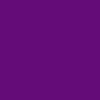

In [156]:
from colorsys import hsv_to_rgb
from PIL import Image

colors = []
for hue in range(100):
    for sat in range(100):
        # Convert color from HSV to RGB
        rgb = [100, inputColor[1], inputColor[0]]
        colors.extend(rgb)

im = Image.frombytes("RGB", (100, 100), bytes(colors))
im


In [157]:
myModel.predict([[inputColor[1], inputColor[0]]])[0]

1